In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [2]:
df = pd.read_csv('D:\BITS PILANI\Data Mining\Lab\Python\Lab 7 - Cluster Validation\s1_modified_labelled.csv')

In [3]:
df.head()

,x,y,Class
0,844536,424646,0
1,870801,476330,0
2,878184,487392,0
3,846693,429031,0
4,777811,751059,0


In [4]:
X = df[['x','y']]

In [5]:
X.head()

,x,y
0,844536,424646
1,870801,476330
2,878184,487392
3,846693,429031
4,777811,751059


In [6]:
X_new = pd.DataFrame(preprocessing.StandardScaler().fit_transform(X))

In [7]:
X_new.head()

,0,1
0,1.202131,-0.512126
1,1.316022,-0.231879
2,1.348037,-0.171897
3,1.211484,-0.488349
4,0.912795,1.257791


<h1>KMeans</h1>

In [8]:
k_means = KMeans(n_clusters=5, n_init=10, max_iter=300, random_state=42, init='random')

In [9]:
k_means.fit(X_new)

KMeans(init='random', n_clusters=5, random_state=42)

In [10]:
label = k_means.predict(X_new)

In [11]:
label

array([2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

d:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


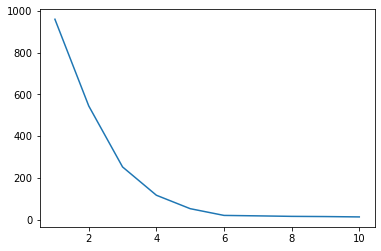

In [12]:
filterlabel0 = X_new[label == 0]
filterlabel1 = X_new[label == 1]
filterlabel2 = X_new[label == 2]
filterlabel3 = X_new[label == 3]
filterlabel4 = X_new[label == 4]

#plt.scatter(X_new.iloc[:,0] , X_new.iloc[:,1])

SSE = []

for i in range(1,11):
    kmeans1 = KMeans(n_clusters=i, init ='random', max_iter=300,  n_init=10, random_state=42)
    kmeans1.fit(X_new)
    SSE.append(kmeans1.inertia_)

plt.plot(range(1,11), SSE)

<h1>DBSCAN</h1>

In [13]:
db = DBSCAN(eps=0.2, min_samples=5)

In [14]:
db.fit(X_new)

DBSCAN(eps=0.2)

In [15]:
label1 = db.labels_

In [16]:
np.unique(label1)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

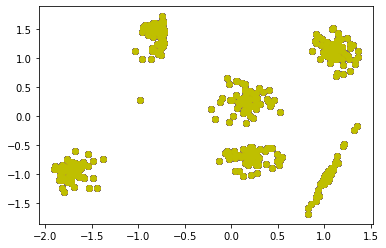

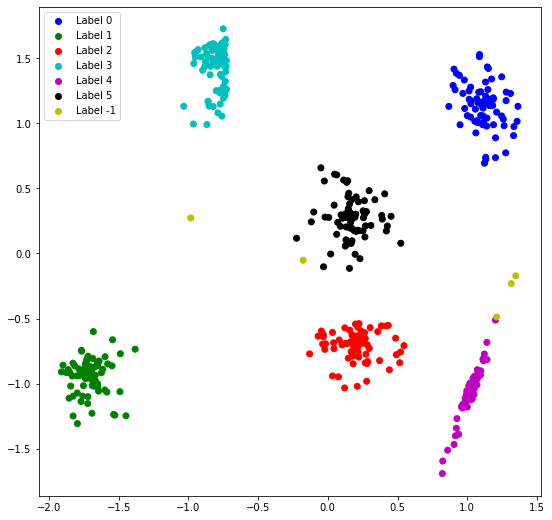

In [17]:
colours = {}
colours[0] = 'b'
colours[1] = 'g'
colours[2] = 'r'
colours[3] = 'c'
colours[4] = 'm'
colours[5] = 'k'
colours[-1] = 'y'

# Building the colour vector for each data point
colvec = [colours[i] for i in label1]

# For the construction of the legend of the plot
r = plt.scatter(X_new[0], X_new[1], color ='r')
g = plt.scatter(X_new[0], X_new[1], color ='g')
b = plt.scatter(X_new[0], X_new[1], color ='b')
k = plt.scatter(X_new[0], X_new[1], color ='k')
c = plt.scatter(X_new[0], X_new[1], color ='c')
m = plt.scatter(X_new[0], X_new[1], color ='m')
y = plt.scatter(X_new[0], X_new[1], color ='y')

# Plotting X on the X-Axis and Y on the Y-Axis
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_new[0], X_new[1], c = colvec)

# Building the legend
plt.legend((b, g, r, c, m, k, y), ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5','Label -1',))

plt.show()


<h1>S-link</h1>

In [18]:
slink = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')

In [19]:
slink.fit(X_new)

AgglomerativeClustering(linkage='single', n_clusters=6)

In [20]:
slink.labels_

array([2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

<h1>Complete Link

In [21]:
clink = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')

In [22]:
clink.fit(X_new)
clink.labels_

array([5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<h1>Ward's Method

In [23]:
ward = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')

In [24]:
ward.fit(X_new)
ward.labels_

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<h1>Silhouette Score

In [25]:
silhouette_score_kmeans = metrics.silhouette_samples(X_new, k_means.labels_, metric='euclidean')
rand_index_kmeans = metrics.adjusted_rand_score(df['Class'], k_means.labels_)

In [26]:
rand_index_kmeans

0.7926245040773887

In [27]:
silhouette_score_kmeans

array([0.39362529, 0.18454515, 0.14243874, 0.3761659 , 0.77112036,
       0.86487202, 0.77302134, 0.86426386, 0.82858378, 0.78275074,
       0.78955466, 0.81507775, 0.82506117, 0.63059775, 0.84388216,
       0.86920387, 0.86885005, 0.85097567, 0.74515042, 0.83123715,
       0.84355268, 0.80991241, 0.86334026, 0.81604371, 0.85063989,
       0.73722197, 0.82657399, 0.78799455, 0.74252329, 0.81982201,
       0.60343843, 0.86568533, 0.72488289, 0.84808901, 0.84295143,
       0.83433357, 0.81626182, 0.61895358, 0.76118631, 0.77892144,
       0.72994483, 0.86968479, 0.85916565, 0.86256859, 0.86127663,
       0.83062438, 0.8673793 , 0.80312415, 0.86989315, 0.86768485,
       0.73529957, 0.81522358, 0.7585395 , 0.81180808, 0.66300436,
       0.85234604, 0.75622355, 0.81669349, 0.80852765, 0.79812267,
       0.79818157, 0.86680903, 0.86481716, 0.86224612, 0.86332024,
       0.7406002 , 0.82694215, 0.84683833, 0.86559761, 0.75281016,
       0.84849209, 0.8137531 , 0.86875908, 0.57002021, 0.85382

In [28]:
silhouette_score_dbscan = metrics.silhouette_samples(X_new, db.labels_, metric='euclidean')
rand_index_dbscan = metrics.adjusted_rand_score(df['Class'], db.labels_)

In [29]:
silhouette_score_slink = metrics.silhouette_samples(X_new, slink.labels_, metric='euclidean')
rand_index_slink = metrics.adjusted_rand_score(df['Class'], slink.labels_)

In [30]:
silhouette_score_clink = metrics.silhouette_samples(X_new, clink.labels_, metric='euclidean')
rand_index_clink = metrics.adjusted_rand_score(df['Class'], clink.labels_)

In [31]:
silhouette_score_ward = metrics.silhouette_samples(X_new, ward.labels_, metric='euclidean')
rand_index_ward = metrics.adjusted_rand_score(df['Class'], ward.labels_)

<h1>Q5

In [32]:
mean_list_kmeans = []
for a in range(0,6):
    mean_list_kmeans.append(silhouette_score_kmeans[k_means.labels_ == a].mean())

C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2451771199.py:3: RuntimeWarning: Mean of empty slice.
  mean_list_kmeans.append(silhouette_score_kmeans[k_means.labels_ == a].mean())
d:\Python\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [33]:
mean_list_kmeans

[0.7677452332716084,
 0.9077646567909458,
 0.5310388350395916,
 0.855980764633404,
 0.8077642913689619,
 nan]

In [34]:
mean_list_dbscan = []
for b in range(0,6):
    mean_list_dbscan.append(silhouette_score_dbscan[db.labels_ == b].mean())

In [35]:
mean_list_slink = []
for c in range(0,6):
    mean_list_slink.append(silhouette_score_slink[slink.labels_ == c].mean())

In [36]:
mean_list_clink = []
for d in range(0,6):
    mean_list_clink.append(silhouette_score_clink[clink.labels_ == d].mean())

In [37]:
mean_list_ward = []
for e in range(0,6):
    mean_list_ward.append(silhouette_score_ward[ward.labels_ == a].mean())

<h1>Q6

In [38]:
silhouette_score_kmeans.mean()

0.7310655665309354

In [39]:
silhouette_score_dbscan.mean()

0.7958342815672201

In [40]:
silhouette_score_slink.mean()

0.6793805200274224

In [41]:
silhouette_score_clink.mean()

0.6268020569816825

In [42]:
silhouette_score_ward.mean()

0.7966116056591922

In [43]:
print('WARDS Method Gives Best Result')

WARDS Method Gives Best Result


<h1>Q7

In [44]:
corr = np.corrcoef(X_new)

In [45]:
corr

array([[ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       [ 1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.]])

<AxesSubplot:>

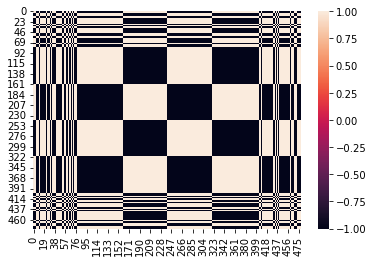

In [46]:
import seaborn as sns

sns.heatmap(corr, vmax=1)

<h1>Q8

In [47]:
matrix_kmeans = pd.DataFrame()

for sample in range(0, len(X_new)):
    column = []
    for row in range(0, len(X_new)):
        if (k_means.labels_[sample] == k_means.labels_[row]):
            column.append(1)
        else:
            column.append(0)
    
    matrix_kmeans.insert(loc=sample, column=sample, value=column, allow_duplicates=True)


C:\Users\HP\AppData\Local\Temp/ipykernel_15592/4128727799.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_kmeans.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/4128727799.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_kmeans.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/4128727799.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

<AxesSubplot:>

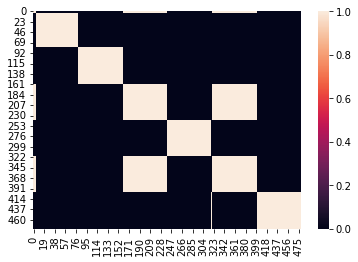

In [48]:
sns.heatmap(matrix_kmeans, vmax=1)

In [49]:
matrix_dbscan = pd.DataFrame()

for sample in range(0, len(X_new)):
    column = []
    for row in range(0, len(X_new)):
        if (db.labels_[sample] == db.labels_[row]):
            column.append(1)
        else:
            column.append(0)
    
    matrix_dbscan.insert(loc=sample, column=sample, value=column, allow_duplicates=True)


C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2936461001.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_dbscan.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2936461001.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_dbscan.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2936461001.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

<AxesSubplot:>

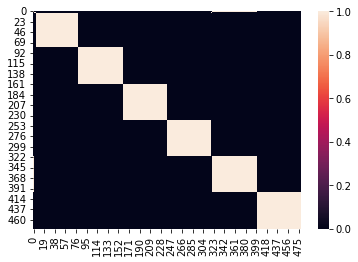

In [50]:
sns.heatmap(matrix_dbscan, vmax=1)

In [51]:
matrix_slink = pd.DataFrame()

for sample in range(0, len(X_new)):
    column = []
    for row in range(0, len(X_new)):
        if (slink.labels_[sample] == slink.labels_[row]):
            column.append(1)
        else:
            column.append(0)
    
    matrix_slink.insert(loc=sample, column=sample, value=column, allow_duplicates=True)


C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2623086410.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_slink.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2623086410.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_slink.insert(loc=sample, column=sample, value=column, allow_duplicates=True)
C:\Users\HP\AppData\Local\Temp/ipykernel_15592/2623086410.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

<AxesSubplot:>

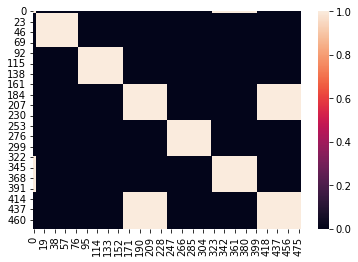

In [52]:
sns.heatmap(matrix_slink, vmax=1)

<h1>Q9

In [53]:
print('Rand Index for KMeans', rand_index_kmeans)
print('Rand Index for DBSCAN', rand_index_dbscan)
print('Rand Index for Slink', rand_index_slink)
print('Rand Index for Clink', rand_index_clink)
print('Rand Index for Wards Method', rand_index_ward)

Rand Index for KMeans 0.7926245040773887
Rand Index for DBSCAN 0.9824274646429886
Rand Index for Slink 0.8022147429363156
Rand Index for Clink 0.809931679984334
Rand Index for Wards Method 0.9803009740372722


<h1>Q10

In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [55]:
zslink = linkage(X_new, method='single')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [45.0, 45.0, 78.125, 78.125],
  [30.0, 30.0, 61.5625, 61.5625],
  [10.0, 10.0, 45.78125, 45.78125]],
 'dcoord': [[0.0, 0.15560787198933893, 0.15560787198933893, 0.0],
  [0.0, 0.7220789078591896, 0.7220789078591896, 0.0],
  [0.0, 0.1816513644933336, 0.1816513644933336, 0.0],
  [0.0, 0.27695724668035243, 0.27695724668035243, 0.1816513644933336],
  [0.0, 0.15443200368304277, 0.15443200368304277, 0.0],
  [0.0, 0.16461079354525868, 0.16461079354525868, 0.15443200368304277],
  [0.0, 0.4297538338393678, 0.4297538338393678, 0.16461079354525868],
  [0.27695724668035243,
   0.5254774670700549,
   0.5254774670700549,
   0.4297538338393678],
  [0.0, 0.7533534384134893, 0.7533534384134893, 0.5254774670700549],
  [0.7220789078591896,
   0.7743214180443214,
   

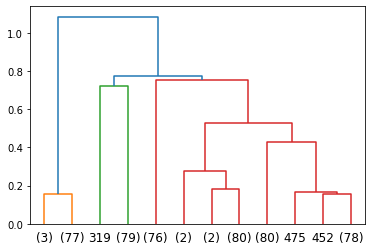

In [56]:
dendrogram(zslink, p=12, truncate_mode='lastp')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [70.0, 70.0, 93.75, 93.75],
  [25.0, 25.0, 81.875, 81.875]],
 'dcoord': [[0.0, 2.093480176801564, 2.093480176801564, 0.0],
  [0.0, 1.4661840457765305, 1.4661840457765305, 0.0],
  [0.0, 1.5160917184834999, 1.5160917184834999, 0.0],
  [1.4661840457765305,
   11.360990994946675,
   11.360990994946675,
   1.5160917184834999],
  [2.093480176801564,
   16.492640690774895,
   16.492640690774895,
   11.360990994946675],
  [0.0, 1.3424372978130619, 1.3424372978130619, 0.0],
  [0.0, 1.6575548329528056, 1.6575548329528056, 0.0],
  [0.0, 2.146452907231794, 2.146452907231794, 1.6575548329528056],
  [0.0, 8.03523115521314, 8.03523115521314, 2.146452907231794],
  [1.3424372978130619,
   24.223602357985474,
   24.223602357985474,
   8.0

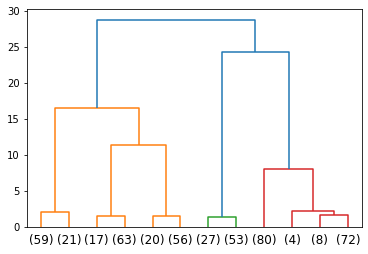

In [57]:
zward = linkage(X_new, method='ward')
dendrogram(zward, p=12, truncate_mode='lastp')